<a href="https://colab.research.google.com/github/lydia-r/Data-110/blob/main/Assignment/Week_5_python_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment: Uncovering Insights from the Titanic Dataset

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic') # load dataset
plt.style.use('ggplot')


### Part 1: understanding the dataset
Task 1: Dataset overview

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataset provides details of passengers aboard. In the Titanic dataset the columns contain various information such as survived(whether the passenger survived or not), passenger class(1st,2nd and 3rd), sex, age, sibs(Number of siblings or spouses aboard),parch(Number of parents or children aboard), fare( the fare paid for the ticket), embarked(The port passenger boarded), class(Ticket class),who(whether the passenger is male, female, or child), deck, embark_town and alive.
There is also a summary of the statistical properties of the dataset, to calulate and display important metrics. This helps with understanding the sense of data distribution, detecting outliers and the range.


### Part 2: Fare and Survival Analysis
Task 2: Fare distribution

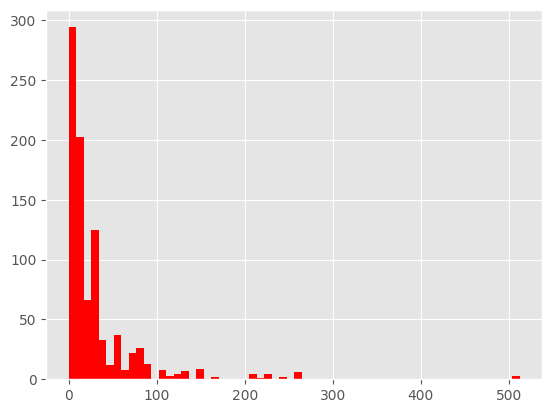

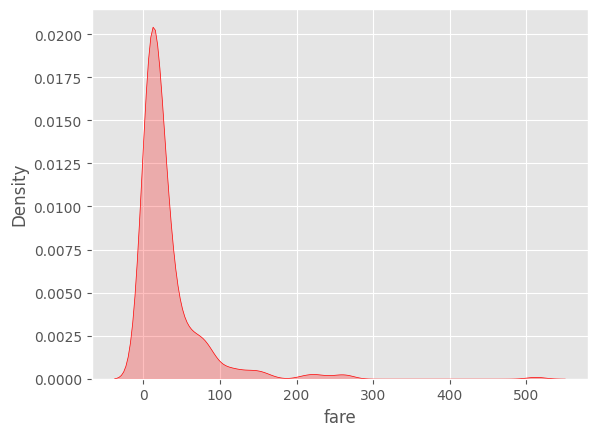

In [41]:
plt.hist(titanic['fare'], bins= 60, color= 'red')
plt.show()

sns.kdeplot(titanic['fare'], fill=True, color='red')
plt.show()

Question: What trends or outliers do you observe in the fare distribution?
* Both the histogram and KDE show right skewed graph showing a large number of passengers traveled in the 3rd class, paying much less than the others. There is few outliers on higher fare range showing 1st class paid way more.
How might fare impact survival rates?
* Those who paid higher have benifits such as proximity for life saviour boats and having assess to saftey than the lower fare payers which is related to socioeconomic status.

Task 3: Fare and Survival Rates

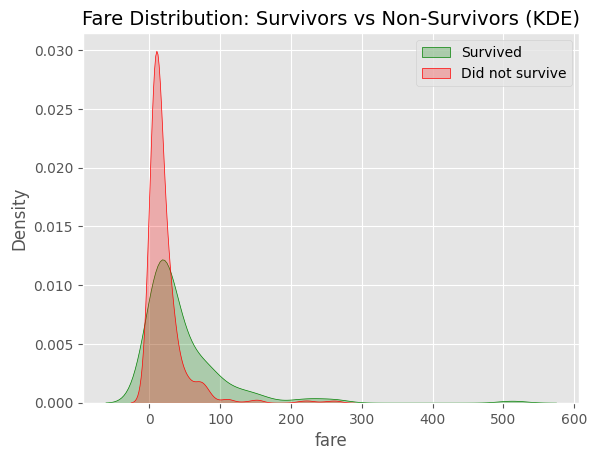

In [11]:
# Separate fares for survivors and non-survivors
survivors_fare = titanic[titanic['survived'] == 1]['fare']
non_survivors_fare = titanic[titanic['survived'] == 0]['fare']

# Creating KDE plot
sns.kdeplot(survivors_fare, label='Survived', fill=True, color='green')
sns.kdeplot(non_survivors_fare, label='Did not survive', fill=True, color='red')
plt.title('Fare Distribution: Survivors vs Non-Survivors (KDE)', fontsize=14)
plt.legend()
plt.show()

Question: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

* Yes fare have influenced survival. The higher the socioeconomic status the higer the fare which results benefits and opportunites of access for survival.

### Part 3: Class, Fare, and Survival Insights
Task 4: Passenger Class, Fare, and Survival

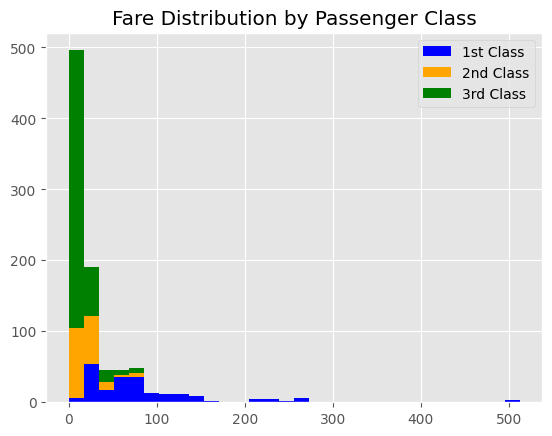

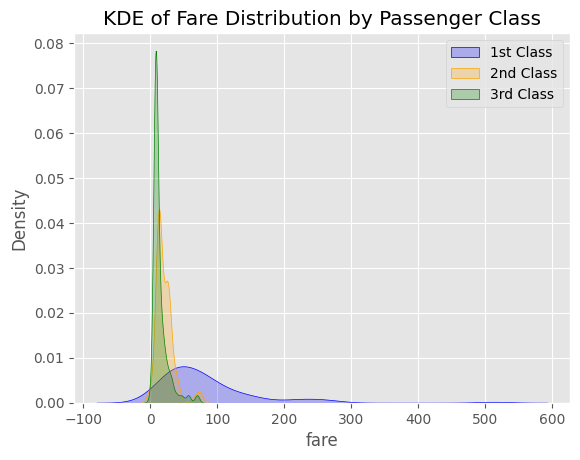

In [42]:
fare_class_1 = titanic[titanic['pclass'] == 1]['fare']
fare_class_2 = titanic[titanic['pclass'] == 2]['fare']
fare_class_3 = titanic[titanic['pclass'] == 3]['fare']

# creating histogram
plt.hist([fare_class_1, fare_class_2, fare_class_3], bins=30, stacked=True, label=['1st Class', '2nd Class', '3rd Class'], color=['blue', 'orange', 'green'])
plt.title('Fare Distribution by Passenger Class')
plt.legend()
plt.show()

#creating KDE plot
sns.kdeplot(fare_class_1, label='1st Class', fill=True, color='blue')
sns.kdeplot(fare_class_2, label='2nd Class', fill=True, color='orange')
sns.kdeplot(fare_class_3, label='3rd Class', fill=True, color='green')
plt.title('KDE of Fare Distribution by Passenger Class')
plt.legend()
plt.show()

Question: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?
*  The patterns in fare distribution and survival rates reflect the socioeconomic divisions. The higher class passengers who can afford to pay more, had better accommodation and priority of safety which resulted higher survival rate. The second class had lower survival than the first class and higher survival than the third clas. The third class has very low survival rate due to less accommodation, safety and priority to evacuate.

### Part 4: Age and Survival
Task 5: Age of Survivors and Non-Survivors

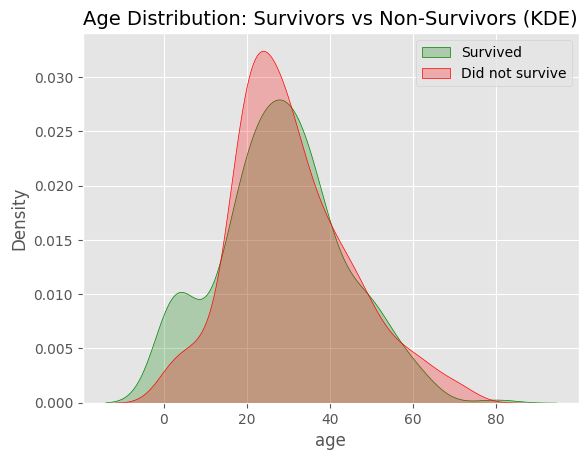

In [16]:
survivors_age = titanic[titanic['survived'] == 1]['age']
non_survivors_age = titanic[titanic['survived'] == 0]['age']

# Creating KDE plot comparing fare distributions of survivors and non-survivors
sns.kdeplot(survivors_age, label='Survived', fill=True, color='green')
sns.kdeplot(non_survivors_age, label='Did not survive', fill=True, color='red')
plt.title('Age Distribution: Survivors vs Non-Survivors (KDE)', fontsize=14)
plt.legend()
plt.show()

Question: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?
*  Yes, children or younger passengers had higher survival rate compard to the not survived. this might be due to childerens first plicy during the evacuation.


Task 6: Pyramid Histogram for Age Survival by Sex

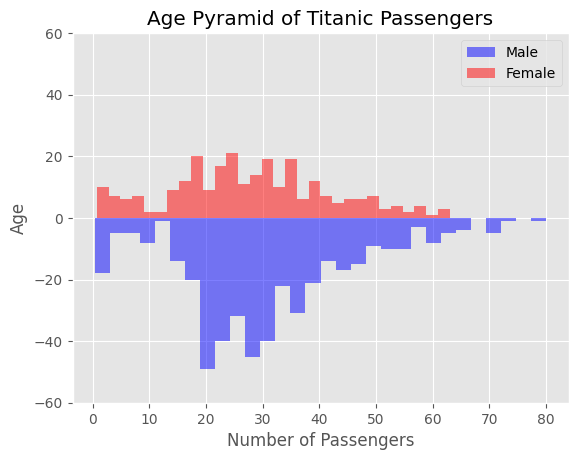

In [17]:
ages_male = titanic[titanic['sex'] == 'male']['age']
ages_female = titanic[titanic['sex'] == 'female']['age']

# Plot the male histogram on the left by multiplying by -1 to mirror the males on the left side
plt.hist(ages_male, bins=30, label='Male', alpha=0.5, color='blue', weights=[-1]*len(ages_male))

# Plot the female histogram on the right
plt.hist(ages_female, bins=30, label='Female', alpha=0.5, color='red')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers')
plt.legend(loc='upper right')

# Fix the y-axis labels to be absolute values for clarity
plt.yticks([-60,-40,-20,0, 20, 40, 60])

plt.show()


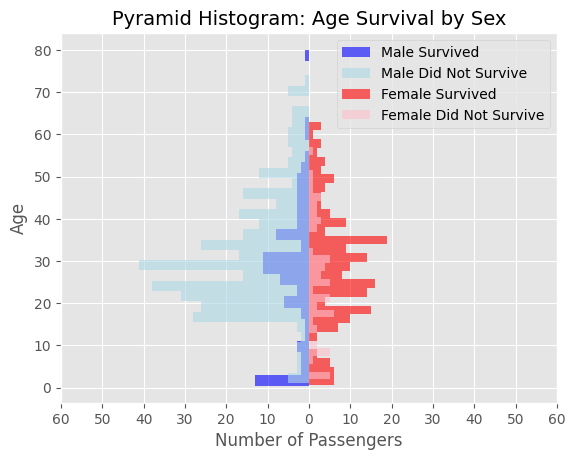

In [45]:
ages_male_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age']
ages_male_not_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 0)]['age']
ages_female_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age']
ages_female_not_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)]['age']

# Ploting the male data
plt.hist(ages_male_survived, bins=30, label='Male Survived', alpha=0.6, color='blue', orientation='horizontal', weights=[-1]*len(ages_male_survived))
plt.hist(ages_male_not_survived, bins=30, label='Male Did Not Survive', alpha=0.6, color='lightblue', orientation='horizontal', weights=[-1]*len(ages_male_not_survived))

# Ploting the female data
plt.hist(ages_female_survived, bins=30, label='Female Survived', alpha=0.6, color='red', orientation='horizontal')
plt.hist(ages_female_not_survived, bins=30, label='Female Did Not Survive', alpha=0.6, color='pink', orientation='horizontal')

plt.title('Pyramid Histogram: Age Survival by Sex', fontsize=14)
plt.xlabel('Number of Passengers')
plt.ylabel('Age')

plt.legend(loc='upper right')
plt.xticks(range(-60, 61, 10), [abs(x) for x in range(-60, 61, 10)])
plt.show()

The first graph shows the age distribution by sex and the second graph shows the age survival distribution by sex.
Question: What can you infer from the age and sex distribution in relation to survival rates?
* The graph shows larger proportion of women and childeren survived. adult women of all age were able to survive where as younger males had higher survival of older males.
*  The pyramid shows a clear visual of how surivival rate were distrbuted across different age and sex groupds.

### Optional Task: Exploring Additional Visualizations
Task 7 (Optional): Bar Graph, Line Plot, and Scatter Plot

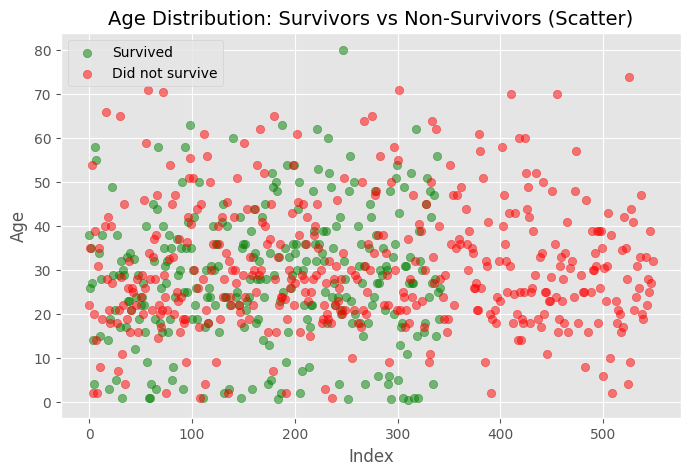

In [26]:
# Scatter plot: Age distributions of survivors vs non-survivors
plt.figure(figsize=(8,5))
plt.scatter(range(len(survivors_age)), survivors_age, label='Survived', color='green', alpha=0.5)
plt.scatter(range(len(non_survivors_age)), non_survivors_age, label='Did not survive', color='red', alpha=0.5)

plt.title('Age Distribution: Survivors vs Non-Survivors (Scatter)', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.legend()
plt.show()


<ipython-input-28-5201b6959db5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic, ci=None)


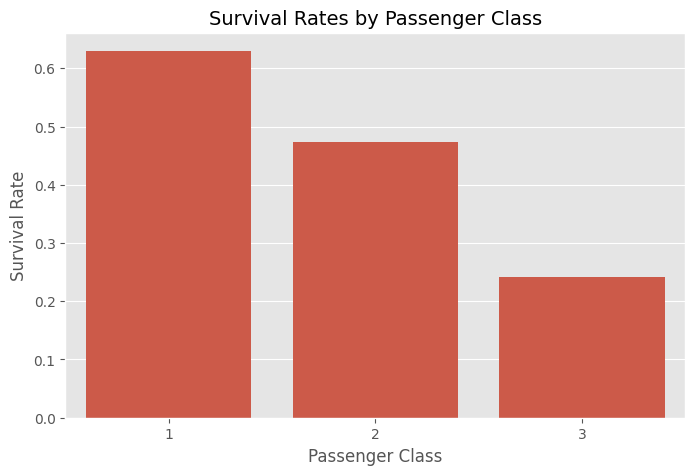

In [28]:
 #Bar graph: Survival rates by passenger class
plt.figure(figsize=(8,5))
sns.barplot(x='pclass', y='survived', data=titanic, ci=None)

plt.title('Survival Rates by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

plt.show()

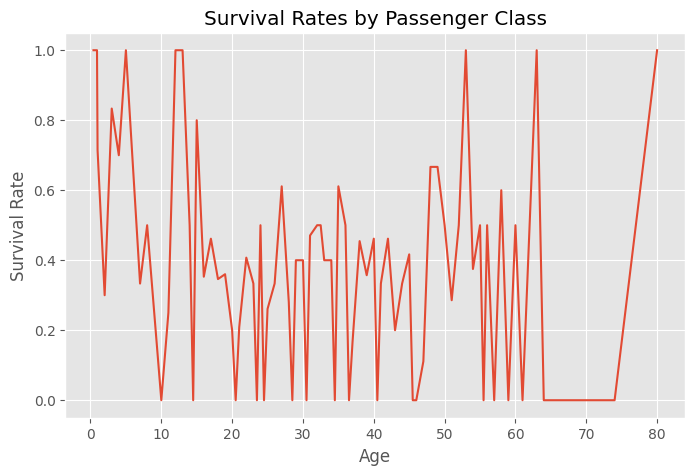

In [50]:

#line graph: Survival rates by age
plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='survived', data=titanic, errorbar=None)

plt.title('Survival Rates by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Survival Rate')

plt.show()

Question: What additional insights do these visualizations provide that weren't evident from the histograms and KDE plots?
* Scatter plot can show an individual data points, providing more detail view on each passenger.
* Bar graph shows very well in comparing catagoies as shows survival rate for class. while histogram focus on distribution, bar graphs allow for a direct comparision of catagories.
* Line grah are good to show trends over continous variable like age or time.